## 復習課題  
$N$個のデータ$(x_{n},y_{n}),n=1,_{\cdots},N$を$M$次の多項式
$$y=w_{0}+w_{1}x+w_{2}x^{2}+\cdots+w_{M}x^{M}$$
でフィッティングする.  

$M=2$, データが $(1, 2), (2, 4), (3, 10), (4, 15)$であるとする.  

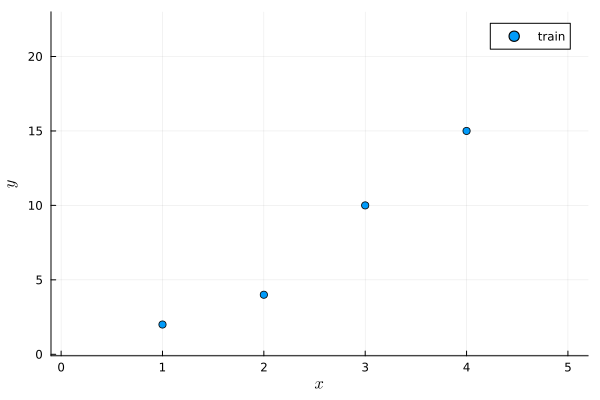

In [12]:
using Plots
using LaTeXStrings

x_train = [1, 2, 3, 4]
y_train = [2, 4, 10, 15]

plot(x_train, y_train, seriestype=:scatter, xlims=(-0.1, 5.2), ylims=(-0.1, 23), label="train")
xlabel!(L"x")
ylabel!(L"y")

### バイアス項を考慮したデータ行列の生成

In [13]:
bias = ones(length(x_train))
tilde_X_train = hcat(bias,x_train,x_train.^2)

4×3 Matrix{Float64}:
 1.0  1.0   1.0
 1.0  2.0   4.0
 1.0  3.0   9.0
 1.0  4.0  16.0

### パラメータの計算

In [14]:
w = float(zeros(Int, 3, 1))
w = (tilde_X_train)' * tilde_X_train \ (tilde_X_train)' * y_train

x = [0:0.1:5]
f(x) = w[1] + w[2] * x + w[3] * x^2

println("(w0, w1, w2) = ($(w[1]), $(w[2]), $(w[3]))")

(w0, w1, w2) = (0.2500000000000382, 0.7499999999999587, 0.7500000000000081)


### フィッティング曲線のプロット

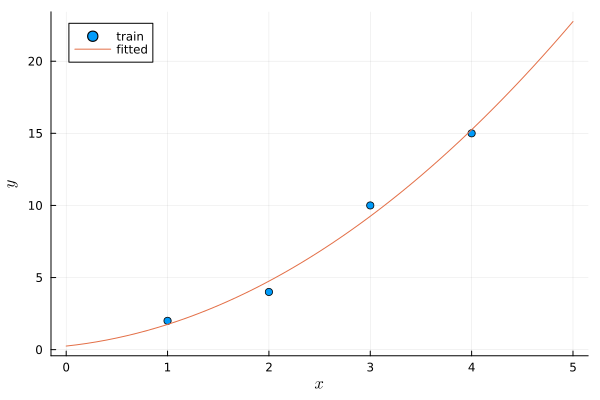

In [15]:
plot(x_train,y_train,seriestype=:scatter,label="train")
plot!(f,x,label="fitted")
xlabel!(L"x")
ylabel!(L"y")